# Entregável 1 - visão computacional

feito por: Henrique Thome e Victor Niubió

In [22]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)
from math import sqrt

OpenCV Version : 4.2.0 


# Equalização de histograma

In [23]:
rintin = cv2.imread("RinTinTin.jpg")

In [24]:
rintin.shape

(240, 320, 3)

In [25]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [26]:
rintin_gray.shape

(240, 320)

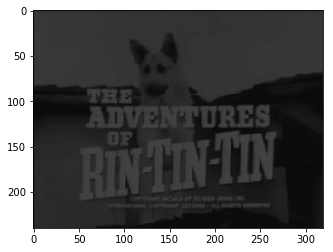

In [27]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

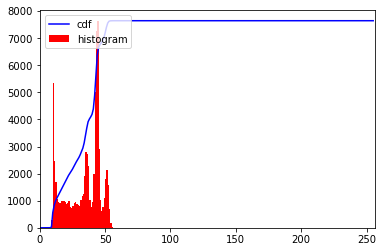

In [28]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [29]:
maxi = np.max(rintin_gray)
mini = np.min(rintin_gray)
maxi,mini
rintin_gray.shape,maxi,mini

((240, 320), 58, 8)

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

In [30]:
def f(x):
    y = (255/50)*x - (255/50)*8
    return y

In [31]:
saida = np.zeros((240, 320), dtype=np.uint8)
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = f(rintin_gray[i][j])

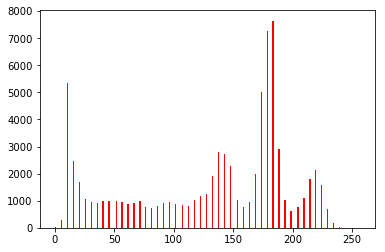

In [32]:
plt.hist(saida.flatten(),256,[0,256], color = 'r');

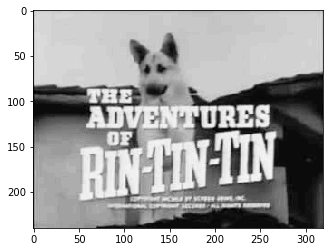

In [33]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


In [97]:
img2 = cv2.imread("cena_canto_sala.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

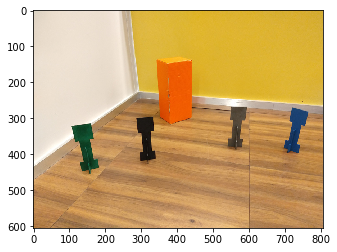

In [98]:
plt.imshow(img2)

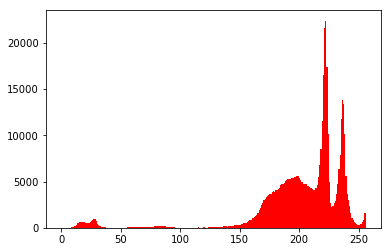

In [99]:
img2_r = img2[:,:,0]
plt.hist(img2_r.flatten(),256,[0,256], color = 'r');

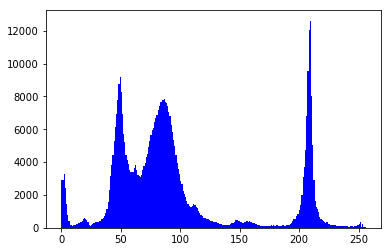

In [100]:
img2_b = img2[:,:,2]
plt.hist(img2_b.flatten(),256,[0,256], color = 'b');

In [106]:
linhas, colunas , rgb = img2.shape
img2_resultado = np.zeros((linhas, colunas), dtype=np.uint8)

In [107]:
for i in range(linhas):
    for j in range(colunas):
        if (img2[i][j][0] > 210 and img2[i][j][2] < 30):
            img2_resultado[i][j] = 255

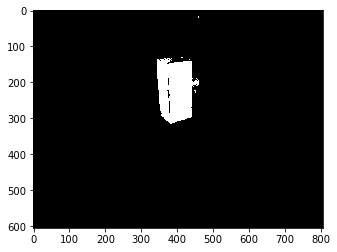

In [108]:
plt.imshow(img2_resultado, cmap="Greys_r")

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [47]:
img3 = cv2.imread("hall_box_battery_atividade3.png")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

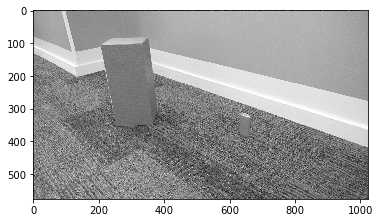

In [58]:
plt.imshow(img3, cmap="Greys_r", vmin=0, vmax=255)
linha2,coluna2 = img3.shape

In [73]:
img3_resultado = np.zeros((576, 1024), dtype=np.uint8)

for i in range(575):
    for j in range(1023):
        if (i != 0 or i != 576):
            primeiro = int(img3[i][j+1])
            segundo = int(img3[i][j-1])
            img3_resultado[i][j] = int(abs(primeiro-segundo))

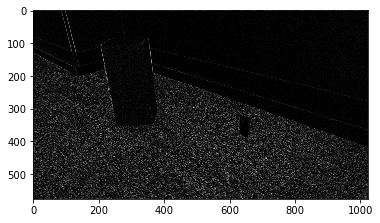

In [74]:
plt.imshow(img3_resultado, cmap="Greys_r", vmin=0, vmax=255)